In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

In [2]:
import torch
import pandas as pd
from engine import Config, Trainer, Plotter, Predictor

In [3]:
config = Config(experiment_name="Example",
                model_name="seq2seq_transformer",
                dataset_name="QCD_Amplitude",
                epochs=5,
                seed=42,
                training_batch_size=128,
                test_batch_size=256,
                optimizer_type="adam",
                optimizer_lr=0.0001,
                vocab_size=2875,
                embedding_size=512,
                hidden_dim=512
                )

In [4]:
loss_fn = torch.nn.CrossEntropyLoss()

class symba_trainer(Trainer):
    def criterion(self, y_pred, y_true):
        return loss_fn(y_pred, y_true)
    
if __name__ == "__main__":
    trainer = symba_trainer(config)
    trainer.fit()

==> Using precomputed data-splits
==> Using default root directory for saving models: ./seq2seq_transformer/QCD_Amplitude/Example
==> Root directory already exists. Overwriting...
Config
experiment_name                Example
root_dir                       ./
device                         cuda
save_at_epochs                 []
debug                          False
epochs                         5
seed                           42
train_shuffle                  True
test_shuffle                   False
training_batch_size            128
test_batch_size                256
num_workers                    4
pin_memory                     True
scheduler_type                 none
scheduler_gamma                0
scheduler_milestones           []
optimizer_type                 adam
optimizer_lr                   0.0001
optimizer_momentum             0.9
optimizer_weight_decay         0.0
optimizer_no_decay             []
clip_grad_norm                 -1
dataset_name                   QCD_Ampl

[1/5] Valid: 100%|███████████████████████████████████████████████████████████████████████████| 83/83 [00:25<00:00,  3.25it/s, loss=0.296, tok_accuracy=0.916]


==> Best Accuracy improved to 0.9164 from -12345


[2/5] Valid: 100%|███████████████████████████████████████████████████████████████████████████| 83/83 [00:25<00:00,  3.25it/s, loss=0.0763, tok_accuracy=0.98]


==> Best Accuracy improved to 0.9804 from 0.9164


[3/5] Valid: 100%|██████████████████████████████████████████████████████████████████████████| 83/83 [00:25<00:00,  3.25it/s, loss=0.0285, tok_accuracy=0.993]


==> Best Accuracy improved to 0.9928 from 0.9804


[4/5] Valid: 100%|██████████████████████████████████████████████████████████████████████████| 83/83 [00:25<00:00,  3.25it/s, loss=0.0124, tok_accuracy=0.997]


==> Best Accuracy improved to 0.997 from 0.9928


[5/5] Valid: 100%|█████████████████████████████████████████████████████████████████████████| 83/83 [00:25<00:00,  3.25it/s, loss=0.00647, tok_accuracy=0.998]


==> Best Accuracy improved to 0.9984 from 0.997


Seq_Acc_Cal: 100%|█████████████████████████████████████████████████████████████████████████████████████| 500/500 [04:15<00:00,  1.95it/s, seq_accuracy=0.822]

Test Accuracy: 0.9984 | Valid Accuracy: 0.9984


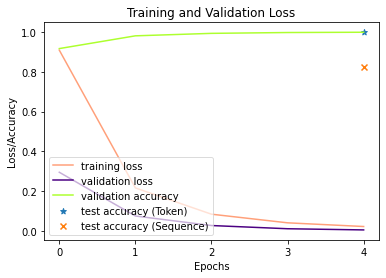

In [5]:
plotter = Plotter(config)
plotter.plot()

In [6]:
predictor = Predictor(config, "cuda")

In [7]:
test_df = pd.read_csv('./data/QCD_Amplitude/test.csv')
src = test_df.iloc[3]
prediction = predictor.predict(src)

In [8]:
print("Original Squared Amplitude: \n")
print(test_df.iloc[3]["Squared_Amplitude"])
print("\n")
print("Predicted Squared Amplitude: \n")
print(prediction)

Original Squared Amplitude: 

[ m_c^2 , m_c^4 , 1 ] , [ -128 *( 4* m_t^4 + m_t^2 *( 4*s_11 +4*s_12 -10*s_13 -4*s_23 -3*s_24 +4*s_34) -s_11*s_24 +4* s_12*s_14 -s_12*s_34 -2* s_12*s_44 +2* s_13*s_24 -3* s_14*s_23 -2* s_14*s_24 +2* s_23*s_34 +2* s_23*s_44 +s_24*s_44) , -128 *( 4* m_t^2 -s_24) , 128 *( 2* m_t^4 *s_13 + m_t^2 *( 2* s_11*s_13 +4* s_11*s_34 +2* s_12*s_13 +s_12*s_34 -4*s_13^2 -2* s_13*s_23 -2* s_13*s_24 +2* s_13*s_44 +s_14*s_23 -8* s_14*s_34) +s_11* s_12*s_34 -s_11* s_14*s_23 -2* s_11*s_23*s_34 -2* s_11*s_24*s_34 +2* s_12*s_13*s_14 -2* s_12*s_14*s_34 -2* s_12*s_34^2 -s_12* s_34*s_44 -2* s_13*s_14*s_24 +2* s_13*s_23*s_34 +2* s_13*s_24*s_34 +2* s_14^2*s_23 +2* s_14*s_23*s_34 -s_14* s_23*s_44 +4* s_14*s_24*s_34) ] , [ 27 *( 2*s_25 -s_55)^2 *( m_c^2 +s_11 -2*s_13)^2 ]


Predicted Squared Amplitude: 

 [ m_c^2 , m_c^4 , 1 ] , [ -128 *( 4* m_t^4 + m_t^2 *( 4*s_11 +4*s_12 -10*s_13 -4*s_23 -3*s_24 +4*s_34) -s_11*s_24 +4* s_12*s_14 -s_12*s_34 -2* s_12*s_44 +2* s_13*s_24 -3* s_14*s_23 -